# Classificação com Árvore de Decisão
## Dataset: Breast Cancer
Nesta atividade, você irá explorar um conjunto de dados real de diagnóstico de câncer de mama, utilizando um classificador baseado em árvore de decisão.

**Objetivos:**
- Carregar e explorar o conjunto de dados [`breast_cancer`](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)
- Treinar uma Árvore de Decisão (`DecisionTreeClassifier`)
- Avaliar o desempenho do modelo
- Visualizar a árvore gerada


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Carregar o dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Tarefa 1: Análise exploratória
- Qual o formato dos dados?
- Quantas classes existem? Qual o balanceamento?
- Qual a média e desvio padrão das principais variáveis?

In [4]:
y.value_counts()

,count
1,357
0,212


## Tarefa 2: Separar dados de treino e teste
- Separe os dados em 80% treino e 20% teste
- Use `random_state=42` para reprodutibilidade

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tarefa 3: Treinar o modelo de Árvore de Decisão
- Use `DecisionTreeClassifier(max_depth=5)`
- Treine com os dados de treino

In [6]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Tarefa 4: Avaliação do Modelo
- Calcule acurácia, precissão, recall e f1-score no conjunto de teste
- Exiba a matriz de confusão

In [7]:
X_test
y_test

,0
204,1
70,0
131,0
431,1
540,1
...,...
486,1
75,0
249,1
238,1


In [8]:
y_pred = tree.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
print("Acuracia ", accuracy_score(y_pred, y_test))
print("Precisao ", precision_score(y_pred, y_test))
print("Recall ", recall_score(y_pred, y_test))
print("F1-score ", f1_score(y_pred, y_test))

Acuracia  0.9473684210526315
Precisao  0.9577464788732394
Recall  0.9577464788732394
F1-score  0.9577464788732394


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:
confusion_matrix(y_pred, y_test)

array([[40,  3],
       [ 3, 68]])

## Tarefa 5: Visualizar a Árvore
- Use `plot_tree` para desenhar a árvore de decisão
- Mostre nomes das features e classes

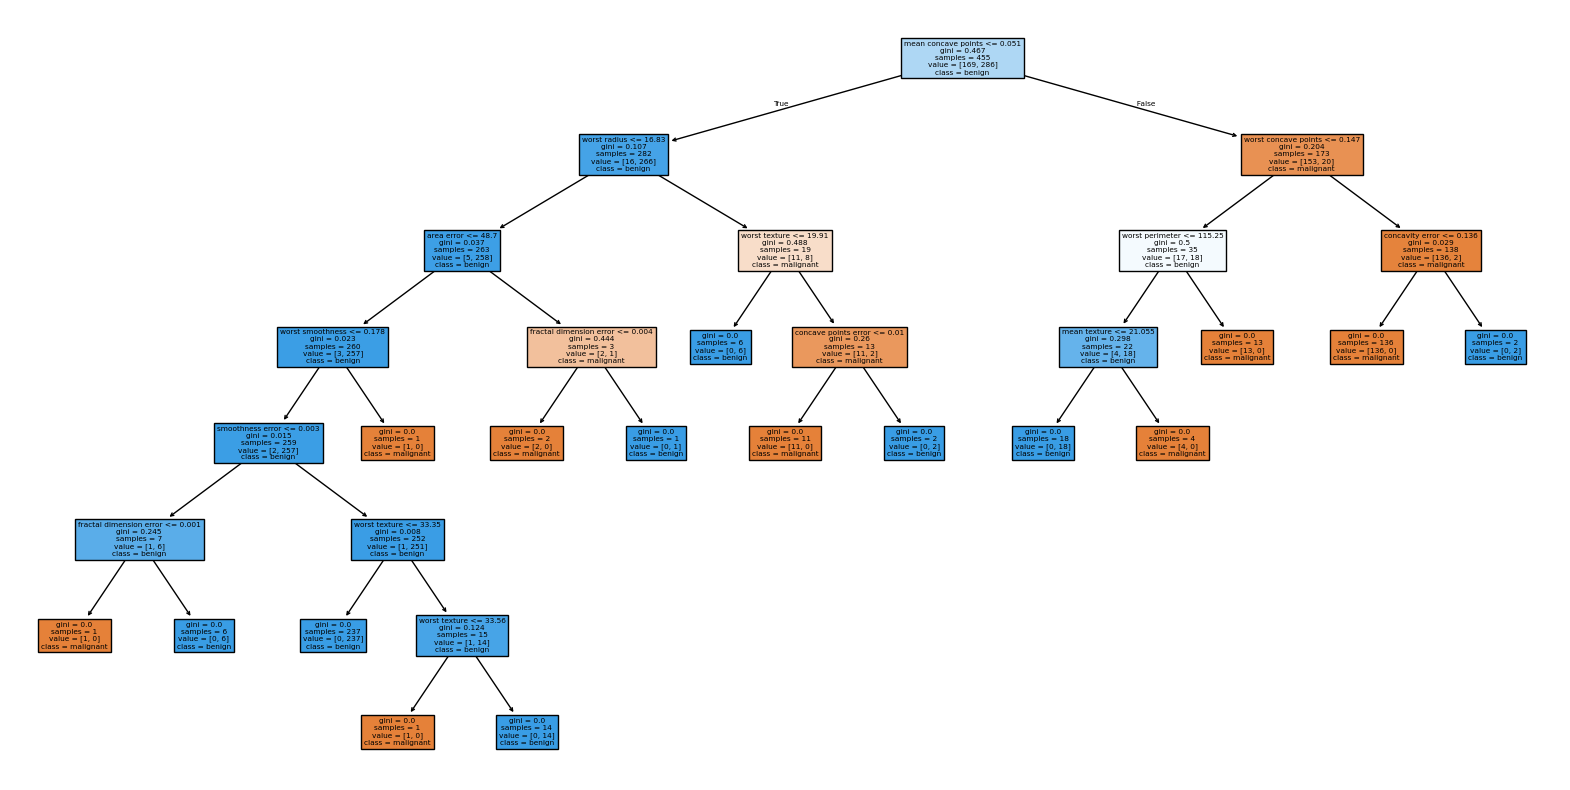

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names.tolist(), filled=True)
plt.show()

## Tarefa 6: Implemente agora o modelo SVM e RandonForest